In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('seaborn-bright')

In [3]:
pd.options.display.max_rows = 50


In [4]:
rec = pd.read_csv("master.csv")

In [5]:
rec.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
rec.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [7]:
rec = rec[rec["year"] !=2016]
rec.drop(columns = ["HDI for year"," gdp_for_year ($) "],inplace = True)

In [8]:
rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27660 non-null  object 
 1   year                27660 non-null  int64  
 2   sex                 27660 non-null  object 
 3   age                 27660 non-null  object 
 4   suicides_no         27660 non-null  int64  
 5   population          27660 non-null  int64  
 6   suicides/100k pop   27660 non-null  float64
 7   country-year        27660 non-null  object 
 8   gdp_per_capita ($)  27660 non-null  int64  
 9   generation          27660 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.3+ MB


In [9]:
rec.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27660.000000,27660.000000,2.766000e+04,27660.000000,27660.000000
mean,2001.173102,243.413485,1.850689e+06,12.812597,16815.568330
std,8.418754,904.490185,3.920658e+06,18.972063,18861.585497
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1994.000000,3.000000,9.753525e+04,0.910000,3436.000000
50%,2002.000000,25.000000,4.307250e+05,5.980000,9283.000000
75%,2008.000000,132.000000,1.491041e+06,16.602500,24796.000000
max,2015.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [10]:
rec.rename(columns = {"suicides_no": "suicides"},inplace = True)

In [11]:
rec1 = rec.groupby(["country-year"])
rec1.agg({"suicides":"sum"})

,suicides
country-year,
Albania1987,73
Albania1988,63
Albania1989,68
Albania1992,47
Albania1993,73
...,...
Uzbekistan2010,1464
Uzbekistan2011,1640
Uzbekistan2012,1835


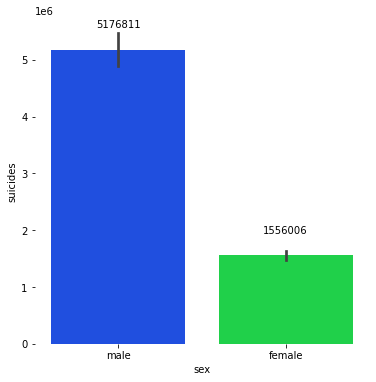

In [12]:
plt.figure(figsize = (6,6))
s = sns.barplot(x = "sex",y = "suicides",data = rec,estimator = np.sum)
for p in s.patches:
    s.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 25), 
                   textcoords = 'offset points')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [13]:
rec[rec["sex"]== "male"]["suicides"].sum()

5176811

In [14]:
rec[rec["sex"]== "female"]["suicides"].sum()

1556006

In [15]:
rec.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'suicides/100k pop', 'country-year', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

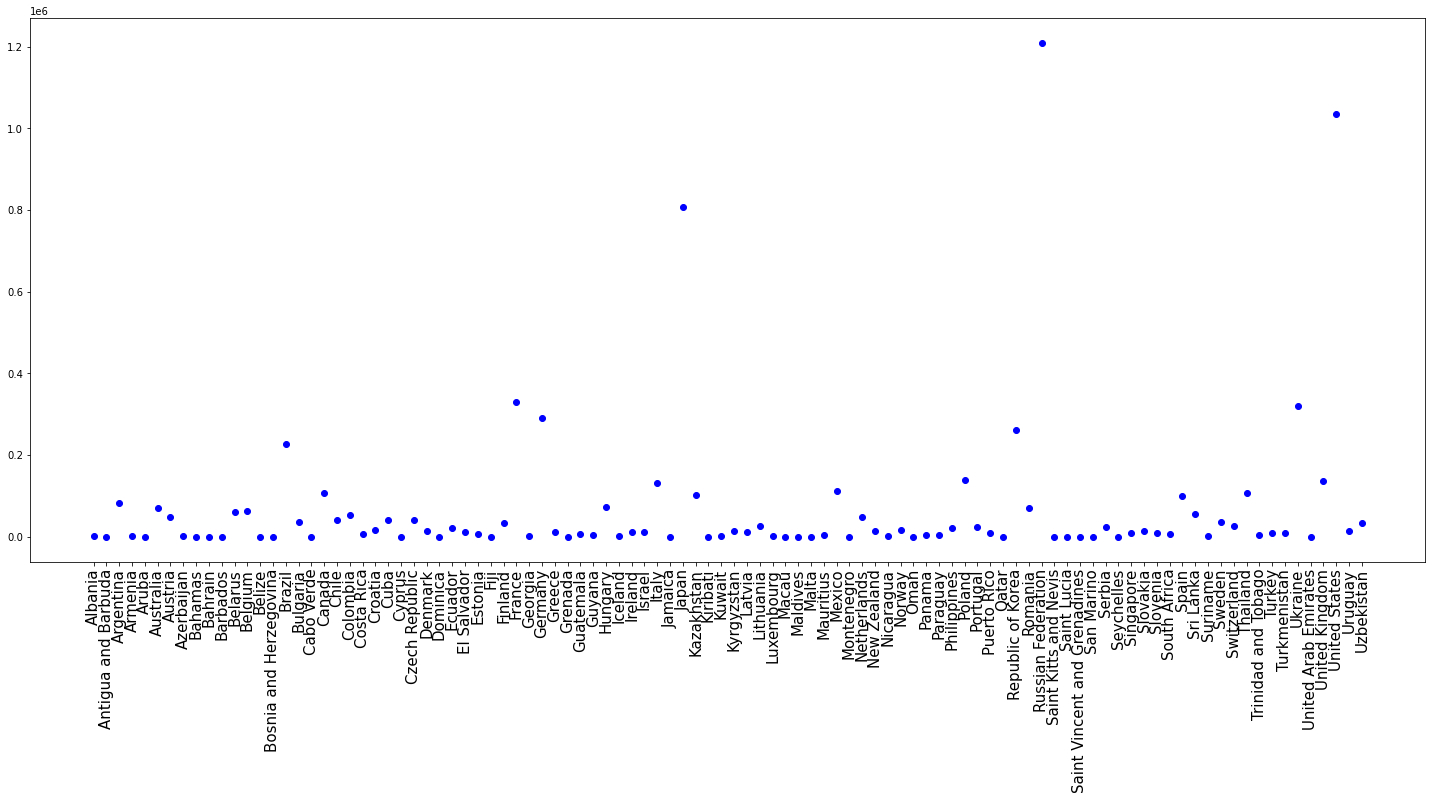

In [16]:
plt.figure(figsize = (25,10))
x = rec.groupby("country").agg({"suicides":"sum"})
plt.plot(x,"bo")
plt.xticks(rotation = 90,fontsize = 15)
plt.show()


In [17]:
#suicide rate is more in russian federation compared to other countries
#second in united states
#third in japan 

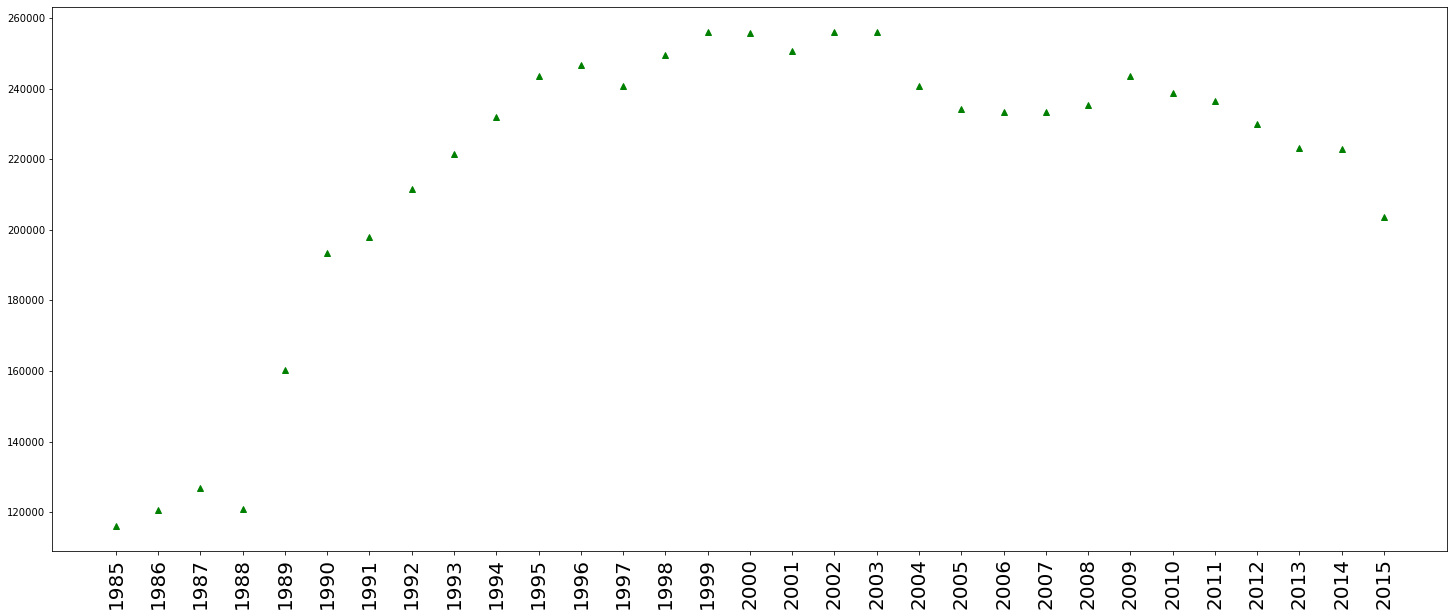

In [18]:
plt.figure(figsize = (25,10))
x = rec.groupby("year").agg({"suicides":"sum"})
plt.plot(x,"g^")
label = np.arange(1985,2016,1)
plt.xticks(rotation = 90,fontsize = 20,ticks = x.index,labels = label)
plt.show()



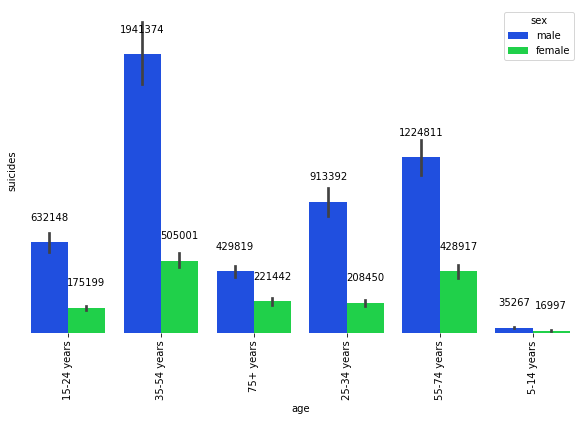

In [19]:
plt.figure(figsize=(10,6))
t = sns.barplot(x = "age", y = "suicides",estimator =np.sum,data = rec,hue = "sex",order = rec["age"].unique())
for p in t.patches:
    t.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 25), 
                   textcoords = 'offset points')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation = 90)
plt.yticks(ticks = [])
plt.show()


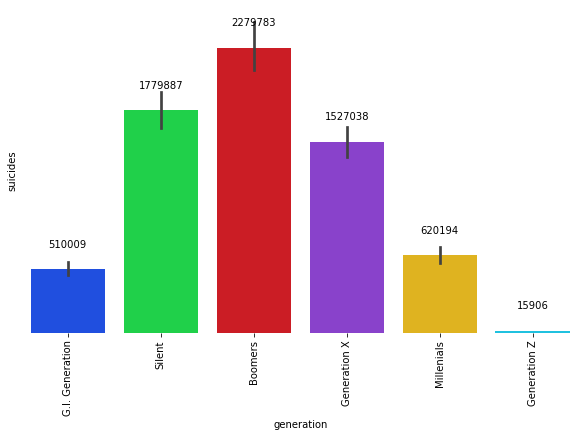

In [20]:
order = ["G.I. Generation","Silent","Boomers","Generation X","Millenials","Generation Z"]
plt.figure(figsize = (10,6))
d = sns.barplot(x = "generation",y = "suicides",data = rec,estimator = np.sum,order = order)
for p in d.patches:
    d.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 25), 
                   textcoords = 'offset points')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation = 90)
plt.yticks(ticks = [])
plt.show()


In [21]:
rec["generation"].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

<Figure size 1440x1440 with 0 Axes>

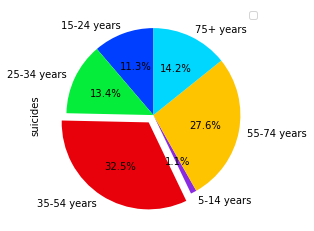

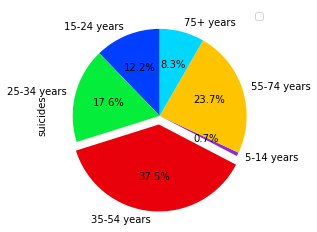

In [22]:
explode = (0,0,0.1,0,0,0)
plt.figure(figsize = (20,20))
rec[rec["sex"]== "female"].groupby("age").agg({"suicides":"sum"}).plot(kind = "pie",autopct = "%1.1f%%",subplots = True,explode = explode,startangle = 90)
plt.legend([])

rec[rec["sex"]== "male"].groupby("age").agg({"suicides":"sum"}).plot(kind = "pie",subplots = True,autopct = "%1.1f%%",explode = explode,startangle = 90)
plt.legend([])

In [23]:
#most suicides cases are of agegroup 35-74

In [24]:
rec.head(15)

,country,year,sex,age,suicides,population,suicides/100k pop,country-year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,796,Generation X


In [25]:
rec["country-year"].nunique()

2305

In [26]:
rec["gdp_per_capita ($)"].nunique()

2219

In [27]:
rec["suicides"].idxmax()

20996

In [28]:
rec.iloc[rec["suicides"].idxmax()]

country                   Russian Federation
year                                    2005
sex                                   female
age                              25-34 years
suicides                                 992
population                          10640505
suicides/100k pop                       9.32
country-year          Russian Federation2005
gdp_per_capita ($)                      5611
generation                      Generation X
Name: 21136, dtype: object

In [29]:
pd.pivot_table(index = "country-year",values = "suicides",columns ="age",data = rec)

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
country-year,,,,,,
Albania1987,17.5,6.5,11.0,0.0,0.5,1.0
Albania1988,12.5,5.0,9.0,0.0,3.5,1.5
Albania1989,8.5,10.0,11.0,0.0,3.5,1.0
Albania1992,8.0,5.5,7.0,0.0,3.0,0.0
Albania1993,14.0,8.0,8.5,1.0,4.5,0.5
...,...,...,...,...,...,...
Uzbekistan2010,227.0,164.0,236.0,39.0,59.0,7.0
Uzbekistan2011,256.0,205.0,267.5,36.5,47.5,7.5
Uzbekistan2012,322.0,219.0,246.5,41.5,79.0,9.5


In [30]:
rec1 =pd.pivot_table(index = "year",values = "suicides",columns ="age",data = rec,aggfunc = np.sum)
rec1

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
year,,,,,,
1985,17870,20771,35748,984,28736,11954
1986,18063,21685,37558,944,29760,12660
1987,16432,22309,40649,935,32469,14048
1988,15337,21332,38770,837,30538,14212
1989,18636,29427,53541,1150,40087,17403
1990,23248,35276,65242,1477,47018,21100
1991,23317,35615,68374,1533,48315,20866
1992,24727,37758,75051,1687,51506,20744
1993,25262,39044,80670,1789,54278,20522


<AxesSubplot:>

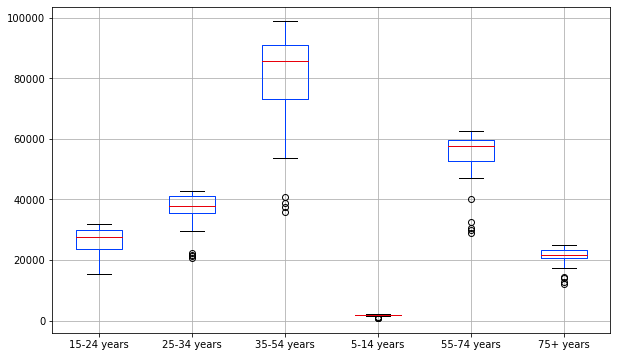

In [31]:
plt.figure(figsize = (10,6))
rec1.boxplot()

<AxesSubplot:xlabel='year'>

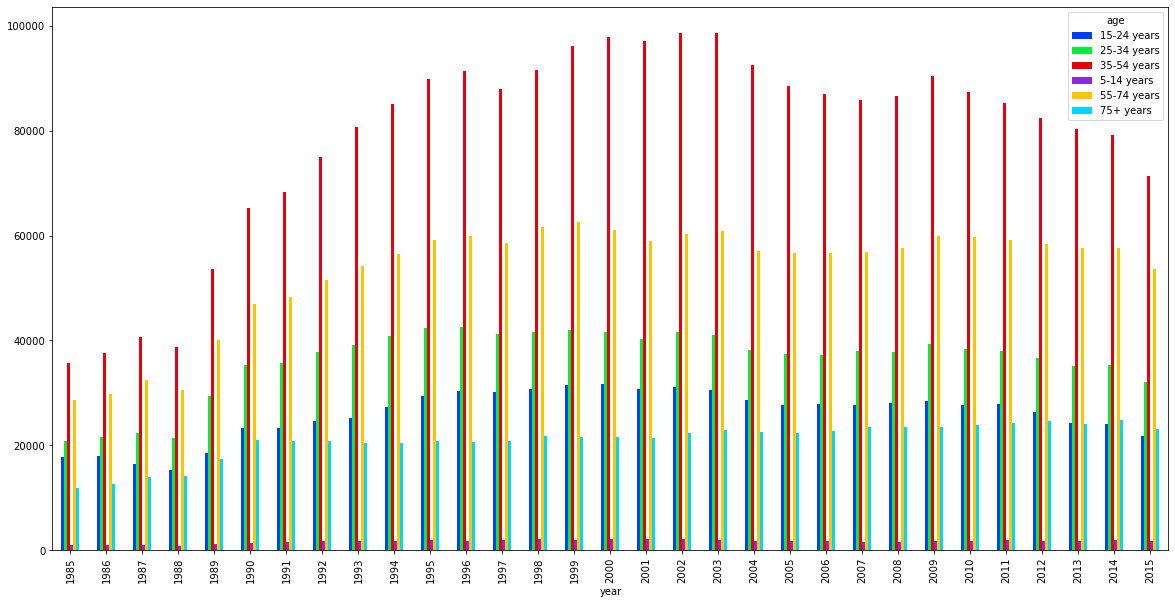

In [32]:
rec1.plot.bar(figsize = (20,10))

<AxesSubplot:xlabel='year'>

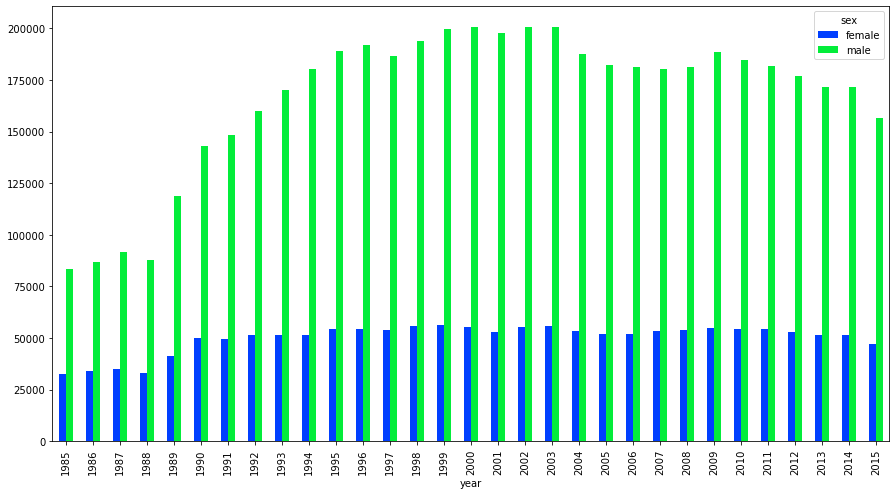

In [33]:
rec3 =pd.pivot_table(index = "year",values = "suicides",columns ="sex",data = rec,aggfunc = np.sum)
rec3.plot.bar(figsize =(15,8))

In [34]:
rec2 =pd.pivot_table(index = "country",values = "suicides",columns ="age",data = rec,aggfunc = np.sum)
rec2

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
country,,,,,,
Albania,546,427,591,61,264,81
Antigua and Barbuda,0,1,6,0,4,0
Argentina,17655,13490,21781,1452,19862,7979
Armenia,169,284,630,24,552,179
Aruba,7,24,42,0,22,6
...,...,...,...,...,...,...
United Arab Emirates,104,257,235,2,23,1
United Kingdom,14925,26287,54085,242,30082,11184
United States,141679,182047,380917,8923,224770,95677


<AxesSubplot:>

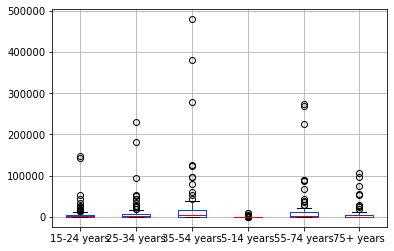

In [35]:
rec2.boxplot()

c:\users\govind\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


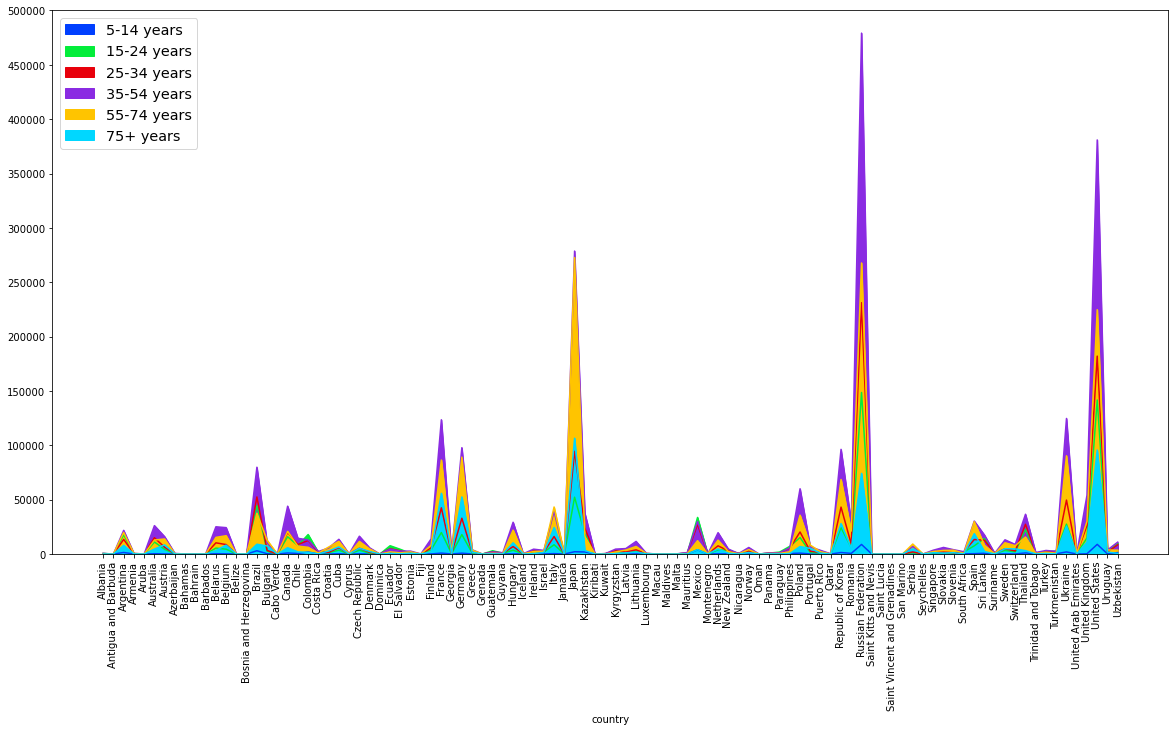

In [36]:
plt.figure(figsize= (20,10))
rec2["5-14 years"].plot.area()
rec2["15-24 years"].plot.area()
rec2["25-34 years"].plot.area()
rec2["35-54 years"].plot.area()
rec2["55-74 years"].plot.area()
rec2["75+ years"].plot.area()
plt.xticks(ticks = range(0,len(rec2.index)),labels = rec2.index,rotation = 90)
plt.yticks(ticks = range(0,550000,50000))
plt.legend(loc = "upper left",fontsize = "x-large")
plt.show()

c:\users\govind\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


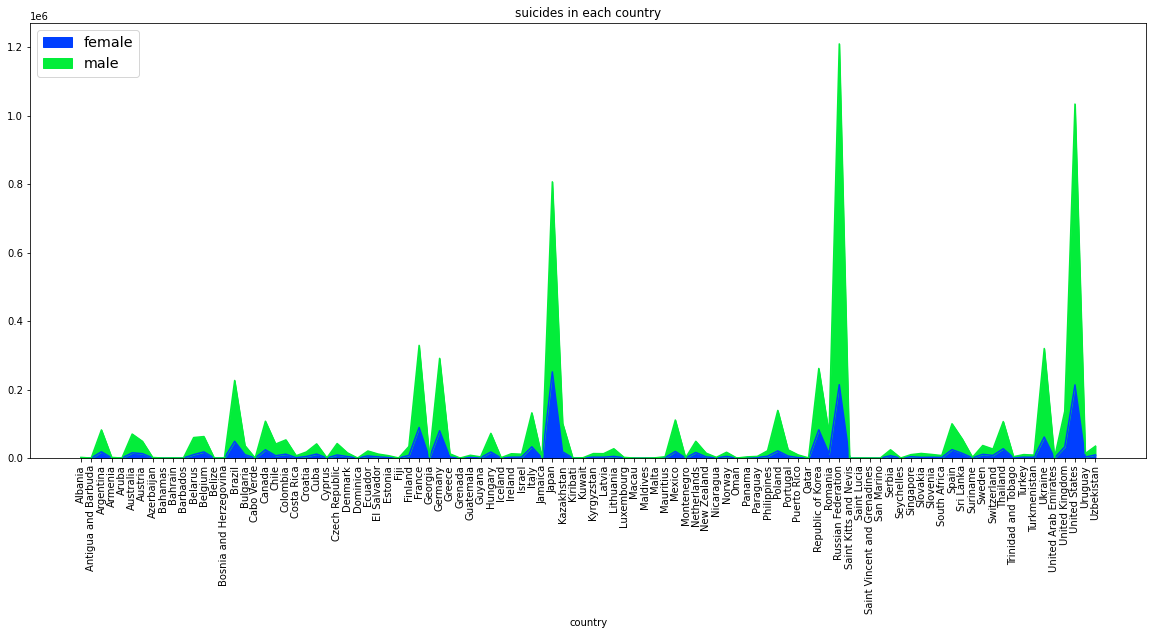

In [37]:
rec4 =pd.pivot_table(index = "country",values = "suicides",columns ="sex",data = rec,aggfunc = np.sum)
rec4.plot.area(figsize = (20,8))
plt.xticks(ticks = range(0,len(rec4.index)),labels = rec4.index,rotation = 90)
plt.legend(loc = "upper left",fontsize = "x-large")
plt.title("suicides in each country")
plt.show()

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides'>

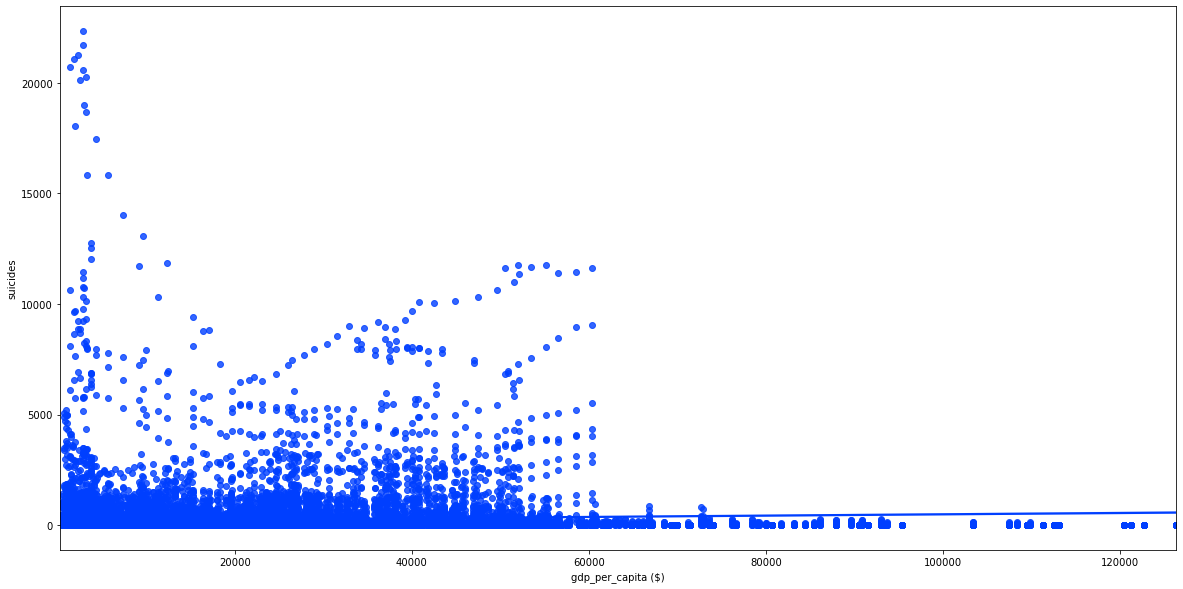

In [38]:
plt.figure(figsize = (20,10))
sns.regplot(x = "gdp_per_capita ($)",y = "suicides",data = rec)

In [41]:
rec.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'suicides/100k pop', 'country-year', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [42]:
rec.head()

,country,year,sex,age,suicides,population,suicides/100k pop,country-year,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,796,Boomers


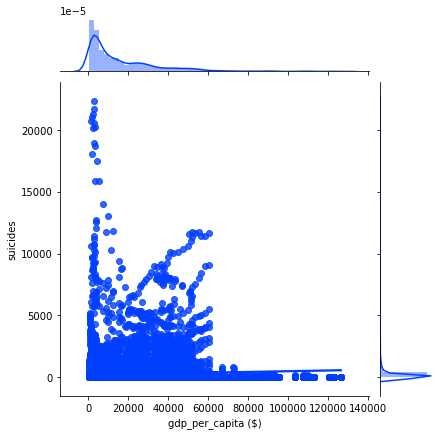

In [43]:
sns.jointplot(x='gdp_per_capita ($)', y='suicides', kind='reg', data=rec)

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides'>

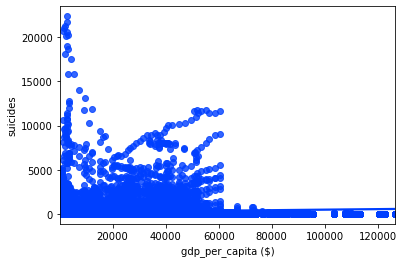

In [44]:
rec5 = rec[rec["country"]== "Russian Federation"]
sns.regplot(x = "gdp_per_capita ($)", y = "suicides",data = rec)

In [45]:
y = rec5["suicides"]
x = rec5[["gdp_per_capita ($)","population"]]
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state= 0)

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
lr.intercept_

998.0354927814005

In [50]:
lr.coef_

array([-0.15098307,  0.00032176])

In [51]:
predictions = lr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

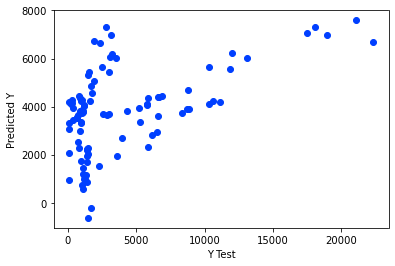

In [52]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [53]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3137.2545445011074
MSE: 17252986.355895467
RMSE: 4153.671430902481
